In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('EasyVisa.csv')

In [4]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
data.shape

(25480, 12)

In [6]:
# continent 
data['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

<Axes: xlabel='case_status'>

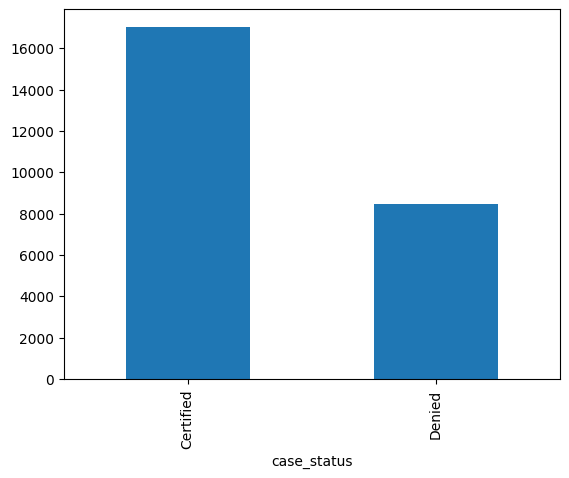

In [7]:
# data imbalance check 
data['case_status'].value_counts().plot.bar()

<Axes: xlabel='education_of_employee'>

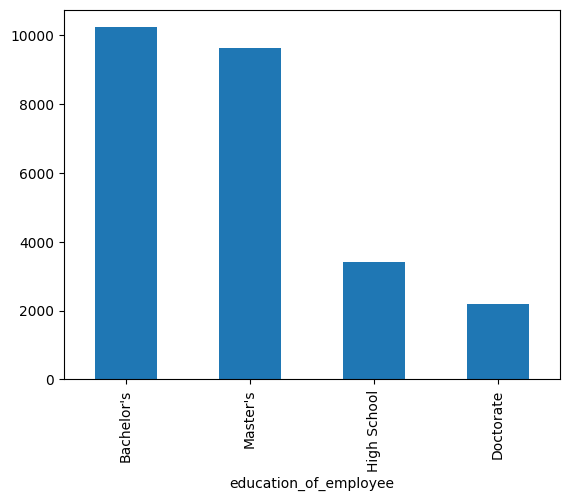

In [8]:
# education 
data['education_of_employee'].value_counts().plot.bar()

<Axes: xlabel='has_job_experience'>

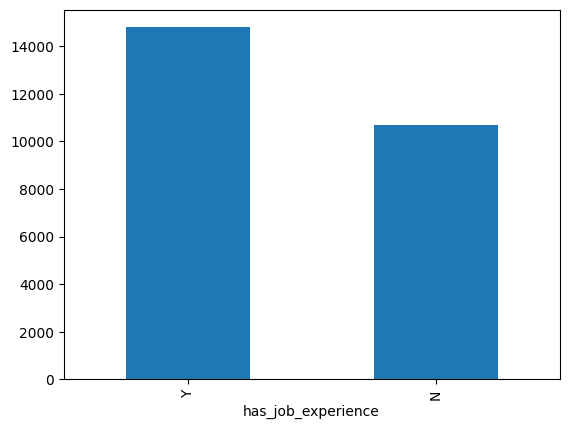

In [9]:
# job expereince

data['has_job_experience'].value_counts().plot.bar()

#### experinced people are more than not experienced in all education background

<Axes: xlabel='education_of_employee', ylabel='percent'>

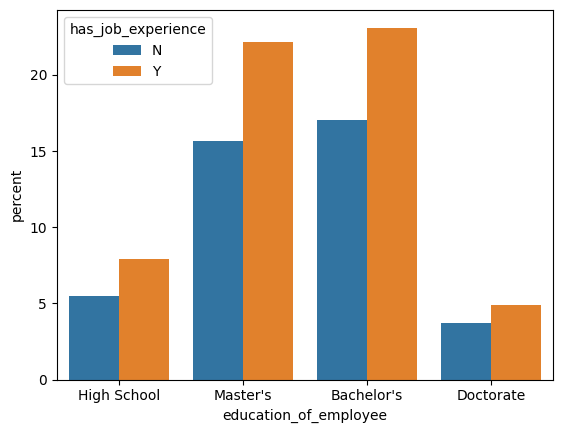

In [10]:
sns.countplot(x='education_of_employee', data=data, hue='has_job_experience', stat='percent')

#### very less no of people require job training for both experieced and not experienced person 

<Axes: xlabel='has_job_experience', ylabel='count'>

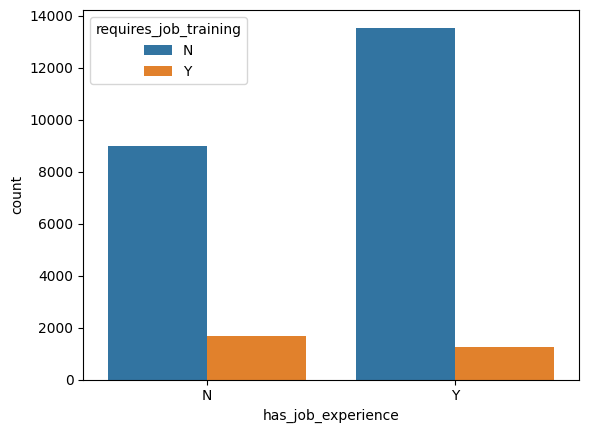

In [11]:
sns.countplot(x='has_job_experience', data=data, hue='requires_job_training', stat='count')

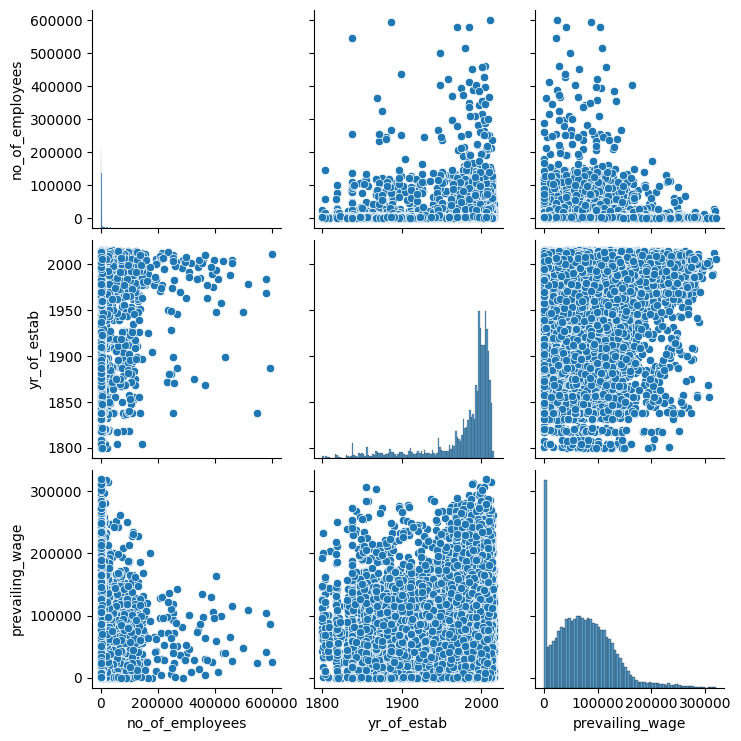

In [12]:
sns.pairplot(data)

In [13]:
# reegion

data['region_of_employment'].value_counts()

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

<Axes: xlabel='education_of_employee', ylabel='percent'>

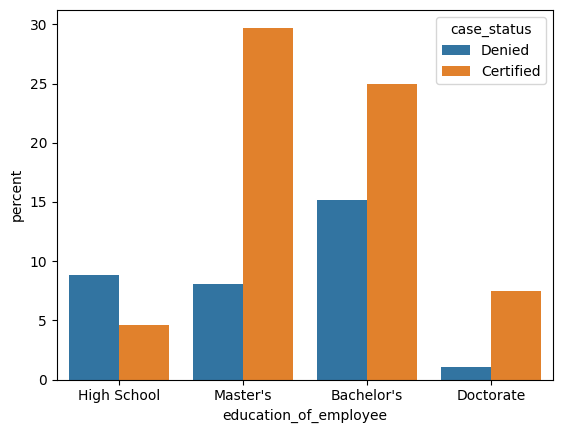

In [14]:
# experience vs status
sns.countplot(x='education_of_employee', data=data, hue='case_status', stat='percent')

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['education_numerical'] = encoder.fit_transform(data['education_of_employee']) + 1
data['education_numerical']

0        3
1        4
2        1
3        1
4        4
        ..
25475    1
25476    3
25477    4
25478    4
25479    1
Name: education_numerical, Length: 25480, dtype: int64

``` 
majoriyt of high school students are accepted in all reagions
in others education level more status are rejected than accepted 
```

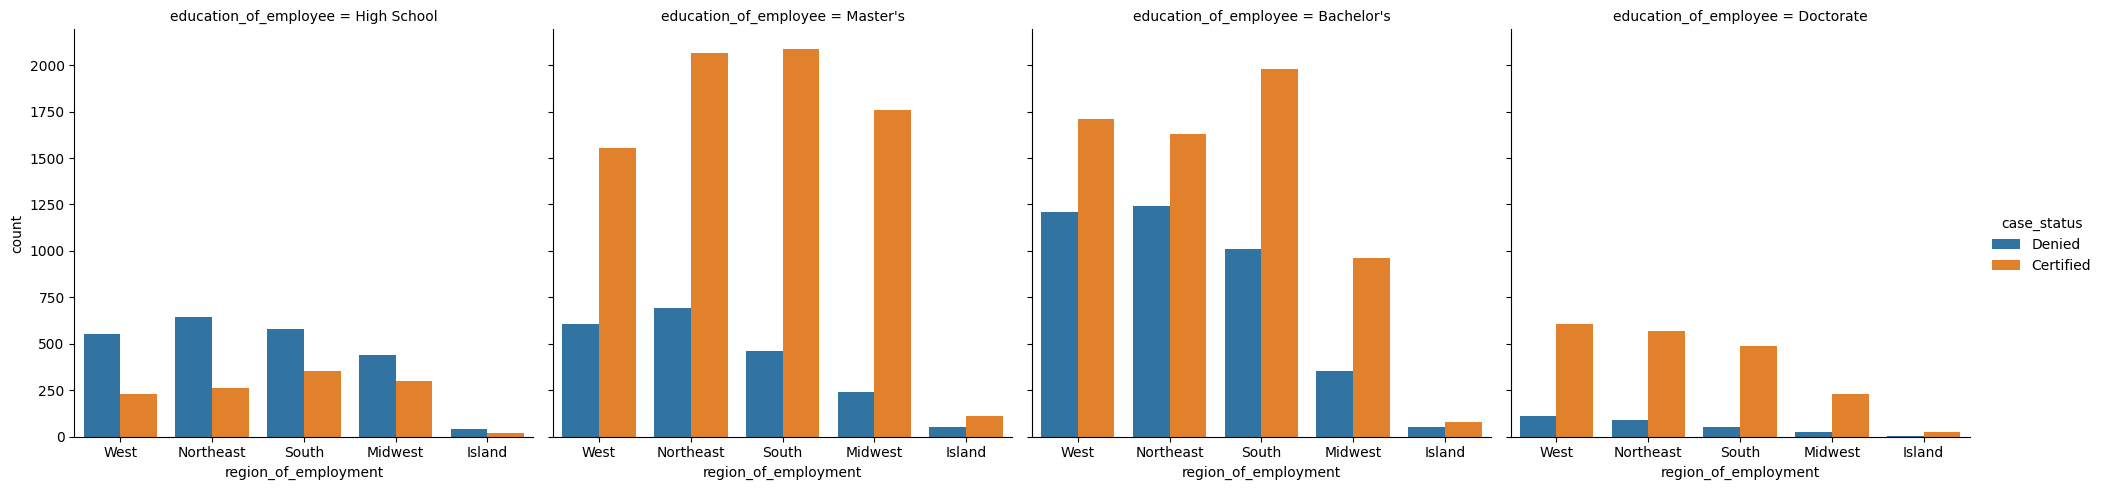

In [16]:
# sns.countplot(data.groupby('region_of_employment')['education_of_employee'])
sns.catplot(x='region_of_employment', y=None, hue='case_status', col='education_of_employee', data=data, kind='count')

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
education_numerical      0
dtype: int64


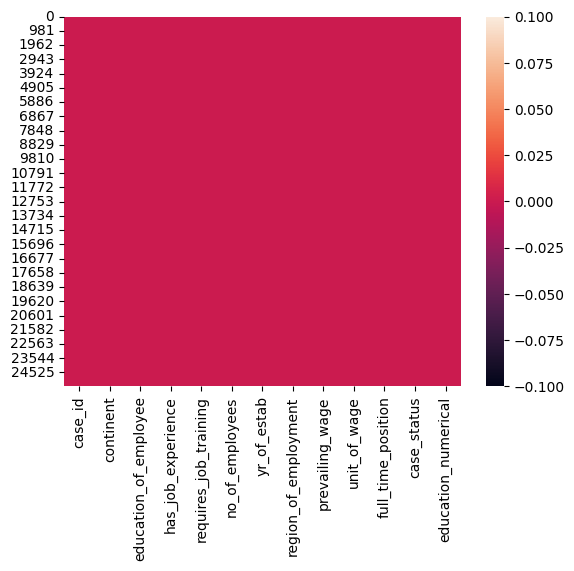

In [19]:
sns.heatmap(data.isnull())
print(data.isnull().sum())

In [21]:
numerical_columns = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_columns = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_columns = categorical_columns[1:]

numerical_columns, categorical_columns

(['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'education_numerical'],
 ['continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'])

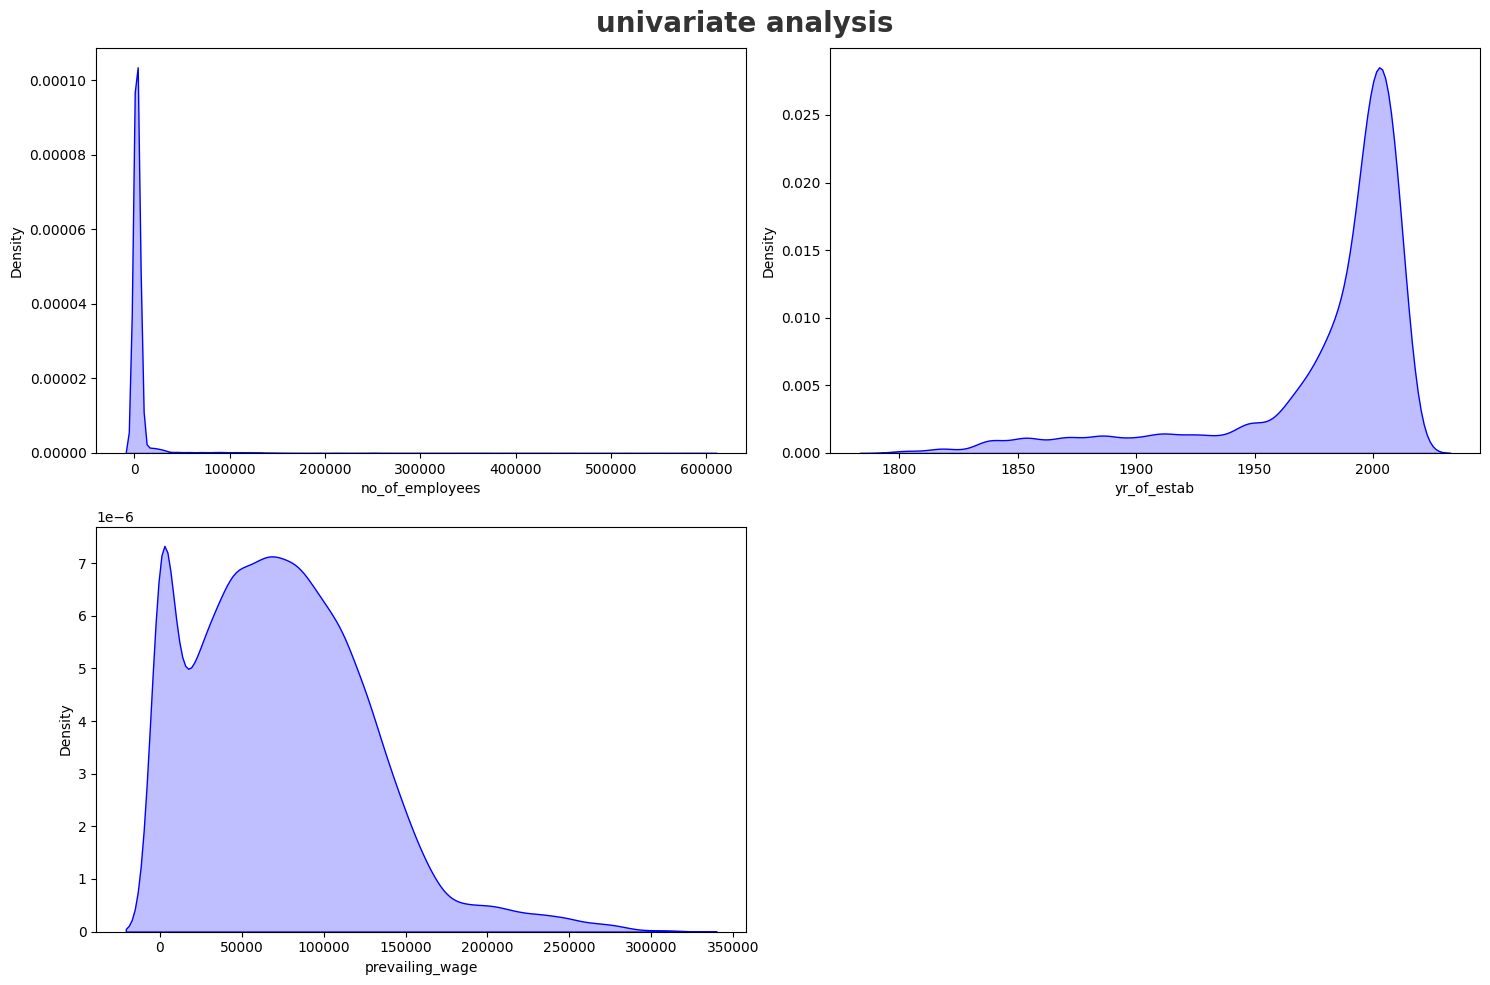

In [35]:
plt.figure(figsize=(15, 10))
plt.suptitle('univariate analysis', fontsize=20, fontweight='bold', alpha=0.8)
for i in range(0, len(numerical_columns)-1):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=data[numerical_columns[i]], color='blue', fill=True)
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

In [36]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage,education_numerical
count,25480.000000,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592,2.488776
std,22877.928848,42.366929,52815.942327,1.345155
min,-26.000000,1800.000000,2.136700,1.000000
25%,1022.000000,1976.000000,34015.480000,1.000000
50%,2109.000000,1997.000000,70308.210000,3.000000
75%,3504.000000,2005.000000,107735.512500,4.000000
max,602069.000000,2016.000000,319210.270000,4.000000


<Axes: xlabel='prevailing_wage', ylabel='Density'>

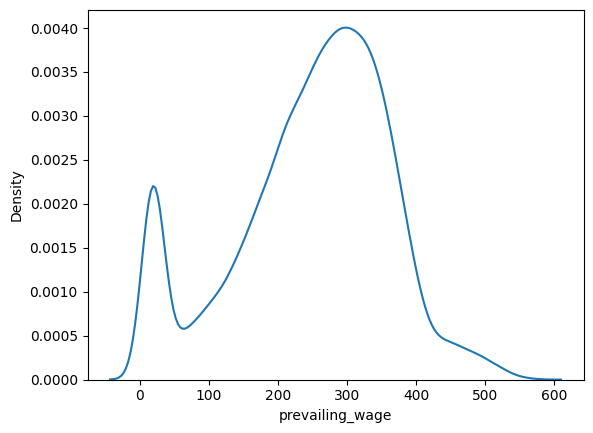

In [39]:
sns.kdeplot(np.sqrt(data['prevailing_wage']))

## Univariate Analysis on Categorical Columns

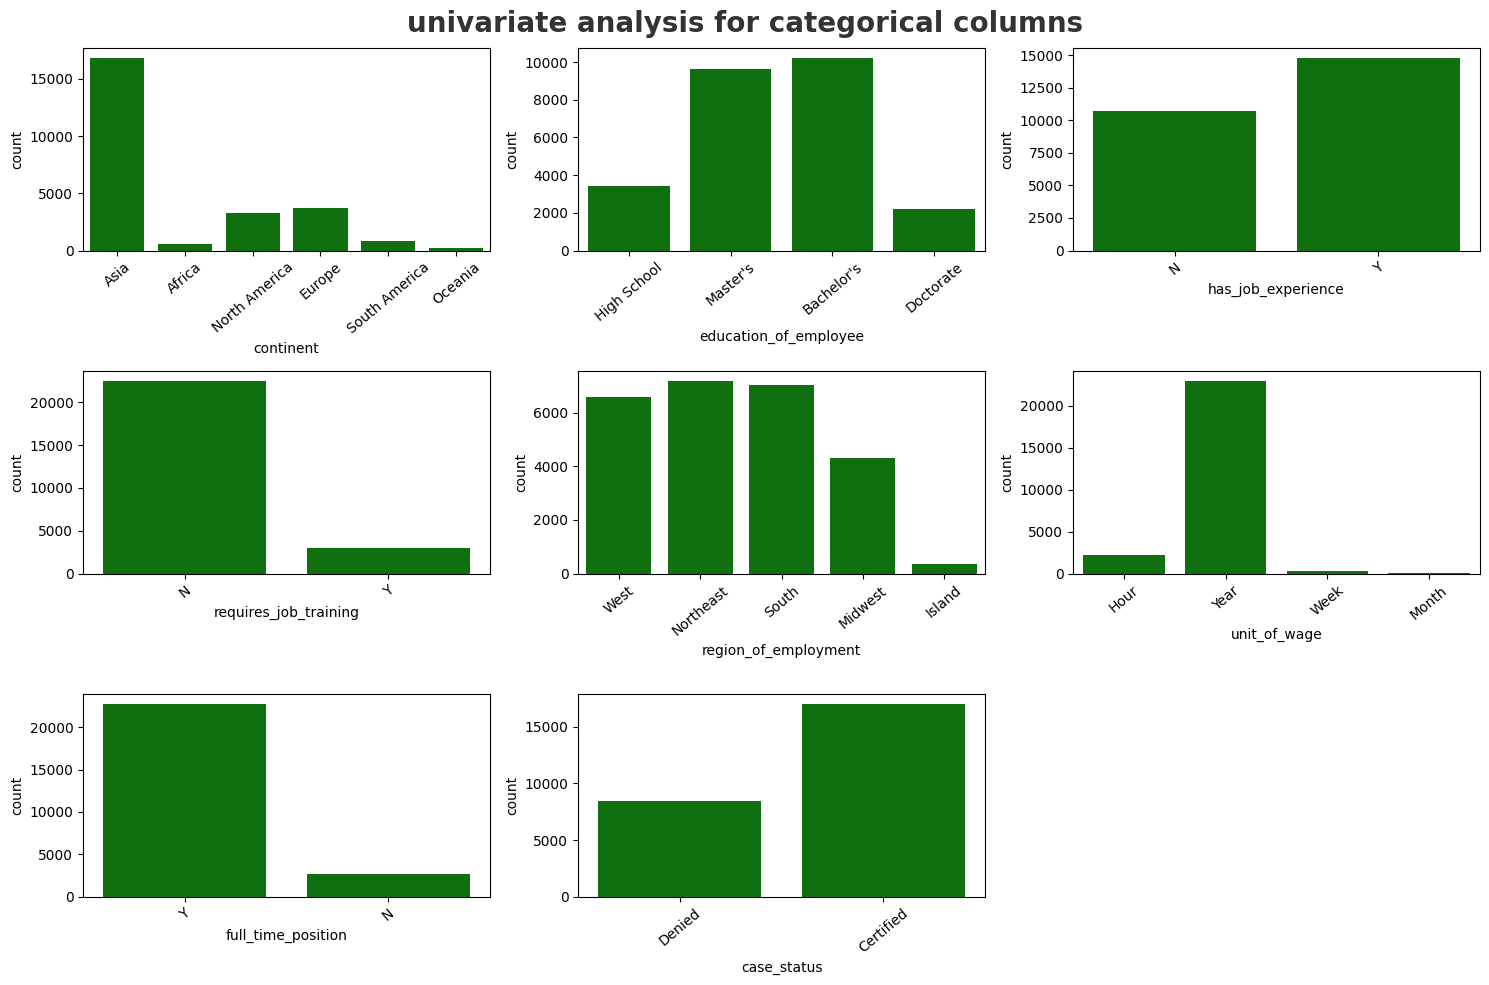

In [47]:
plt.figure(figsize=(15, 10))
plt.suptitle('univariate analysis for categorical columns', fontsize=20, fontweight='bold', alpha=0.8)
for i in range(0, len(categorical_columns)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=data[categorical_columns[i]], color='green')
    plt.xlabel(categorical_columns[i])
    plt.xticks(rotation=40)
    plt.tight_layout()

## Multivariate Analysis

In [53]:
discrete_features = [feature for feature in numerical_columns[:-1] if data[feature].nunique() <=25]
continous_features = [feature for feature in numerical_columns[:-1] if data[feature].nunique() >=25]

print(discrete_features, '\n',continous_features)

[] 
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [56]:
from scipy.stats import chi2_contingency


In [62]:
categorical_columns

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

### chi-2 test
```
null hypothesis - these is not relation
alternative hypothesis - these is some relation

depends on p-value
if p-value < =0.05, then reject null hypothesis
else accpt fail to reject null hypothesis
```

In [81]:
results = []
for feature in categorical_columns:
    if chi2_contingency(pd.crosstab(data['case_status'], data[feature]))[1]<0.05:
        results.append('Reject NUll Hypothesis')
    else:
        results.append('Fail to reject NUll Hypothesis')

chi_2_results = pd.DataFrame(data=[categorical_columns, results]).T
chi_2_results.columns = ['feature', 'hypothesis']
chi_2_results

,feature,hypothesis
0,continent,Reject NUll Hypothesis
1,education_of_employee,Reject NUll Hypothesis
2,has_job_experience,Reject NUll Hypothesis
3,requires_job_training,Fail to reject NUll Hypothesis
4,region_of_employment,Reject NUll Hypothesis
5,unit_of_wage,Reject NUll Hypothesis
6,full_time_position,Reject NUll Hypothesis
7,case_status,Reject NUll Hypothesis


In [68]:
chi2_contingency(pd.crosstab(data['case_status'], data['case_status']))[1]

np.float64(0.0)

### target col vs continous features

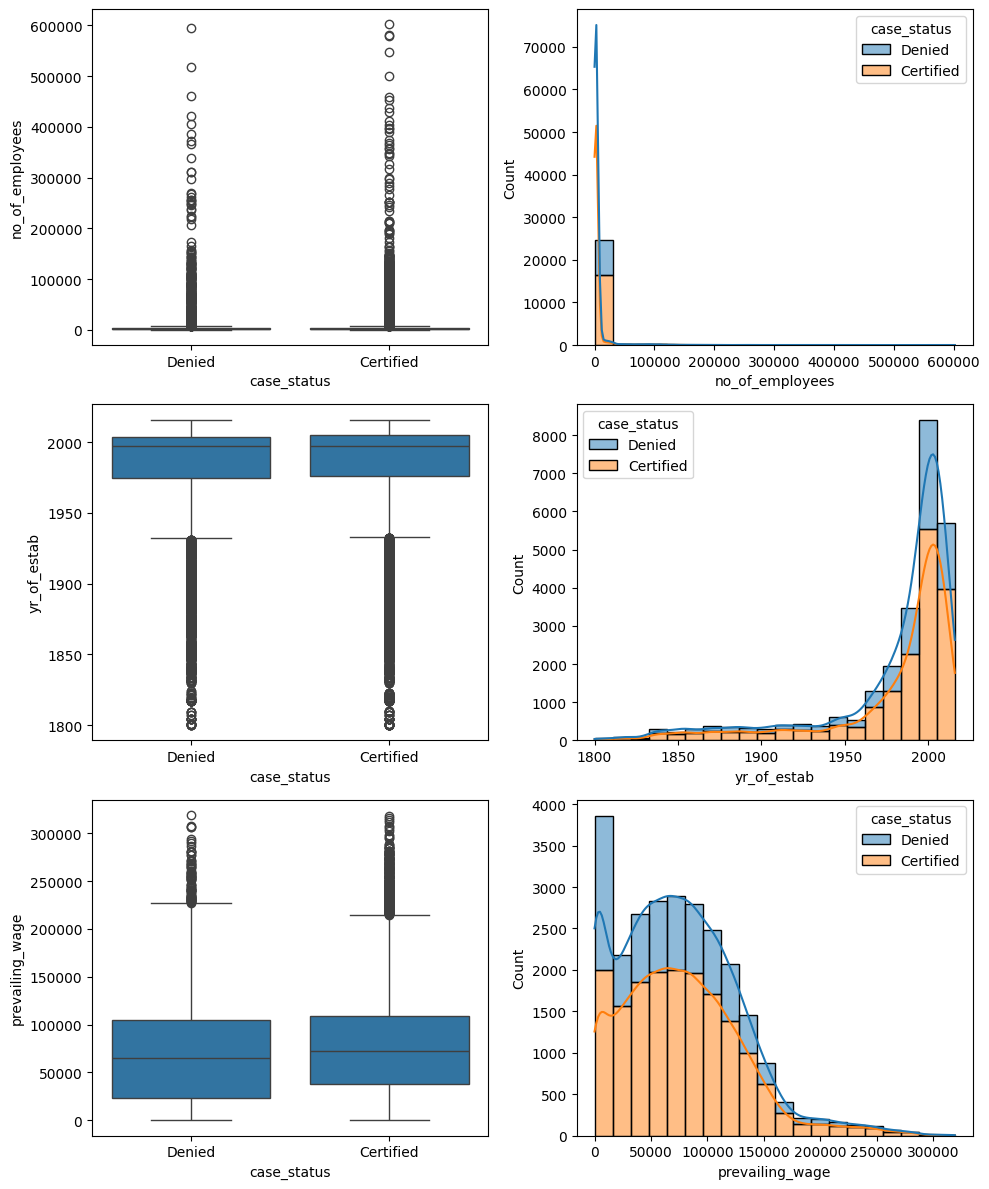

In [72]:
fig, ax = plt.subplots(3, 2, figsize=(10, 12))

for i, col in enumerate(continous_features):
    sns.boxplot(data=data, x='case_status', y=col, ax=ax[i, 0])
    
    sns.histplot(data=data, x=col, hue='case_status', bins=20, kde=True,
                 multiple='stack', ax=ax[i, 1])     
    fig.tight_layout()

In [85]:
data['case_status'].value_counts(normalize=True)*100

case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64

Text(0.5, 0, 'Case Satus')

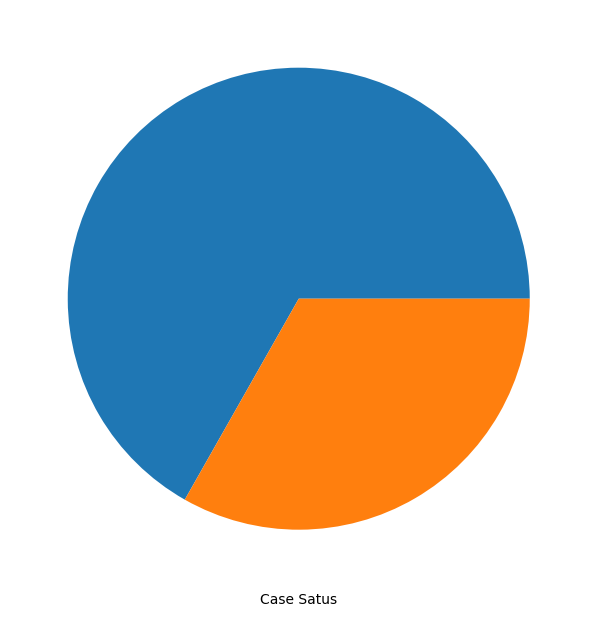

In [90]:
fig, ax = plt.subplots(figsize=(10, 7.5))
ax.pie(data['case_status'].value_counts(normalize=True)*100)
ax.set_xlabel('Case Satus')